<b>Name: Seetha Rama Raju Mudunooru</b>

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Part1

 <b>Question 1</b>
 
 
 <font color=darkblue>  
   Import and warehouse data
 </font> 


Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import the datasets

In [2]:
normal = pd.read_csv('Part1 - Normal.csv')
typeh = pd.read_csv('Part1 - Type_H.csv')
types = pd.read_csv('Part1 - Type_S.csv')

Let's look at the shapes of each of them

In [3]:
normal.shape

(100, 7)

In [4]:
typeh.shape

(60, 7)

In [5]:
types.shape

(150, 7)

We can see that each of them has 7 columns and 100,60 and 150 rows respectively

Let's now merge the three datasets into one final dataset and explore its shape

In [6]:
dataset = pd.concat([normal,typeh,types],axis=0)

Let's look at its shape now

In [7]:
dataset.shape

(310, 7)

We can see that there are a total of 310 rows and 7 columns

 <b>Question 2</b>
 
 
 <font color=darkblue>  
   Data cleansing
 </font> 


Let's look at the datatype of each variable

In [8]:
dataset.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Now let's look at missing values

In [9]:
dataset.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

We can see that there are no missing values

Let's look at the components of class variable

We can see that there are issues with the components. We will make the components uniform. We have to clean this which we will do below

In [10]:
def class_clean(x):
    if x in ('Type_S','tp_s'):
        return 'Type_S'
    elif x in ('Normal','Nrmal'):
        return 'Normal'
    else:
        return 'Type_H'

In [11]:
dataset['Class'] = dataset['Class'].apply(class_clean)

In [12]:
dataset['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

Let's change the values to numerical so that we can fit an algorithm.

In [13]:
def class_func(x):
    if x == 'Type_S':
        return 0
    elif x == 'Normal':
        return 1
    else:
        return 2

In [14]:
dataset['Class'] = dataset['Class'].apply(class_func)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 19.4 KB


The variable has been finally cleaned. The data set can be used to fit a model

<b>Question 3</b>

<font color=darkblue>
    Analysis and Visualization
</font>

In [16]:
dataset.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1


Let's look at the data stats

In [17]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310.0,0.709677,0.771396,0.000000,0.000000,1.000000,1.000000,2.000000


S_Degree is right skewed. The others are fine

Let's now look at the distribution of variables across classes.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

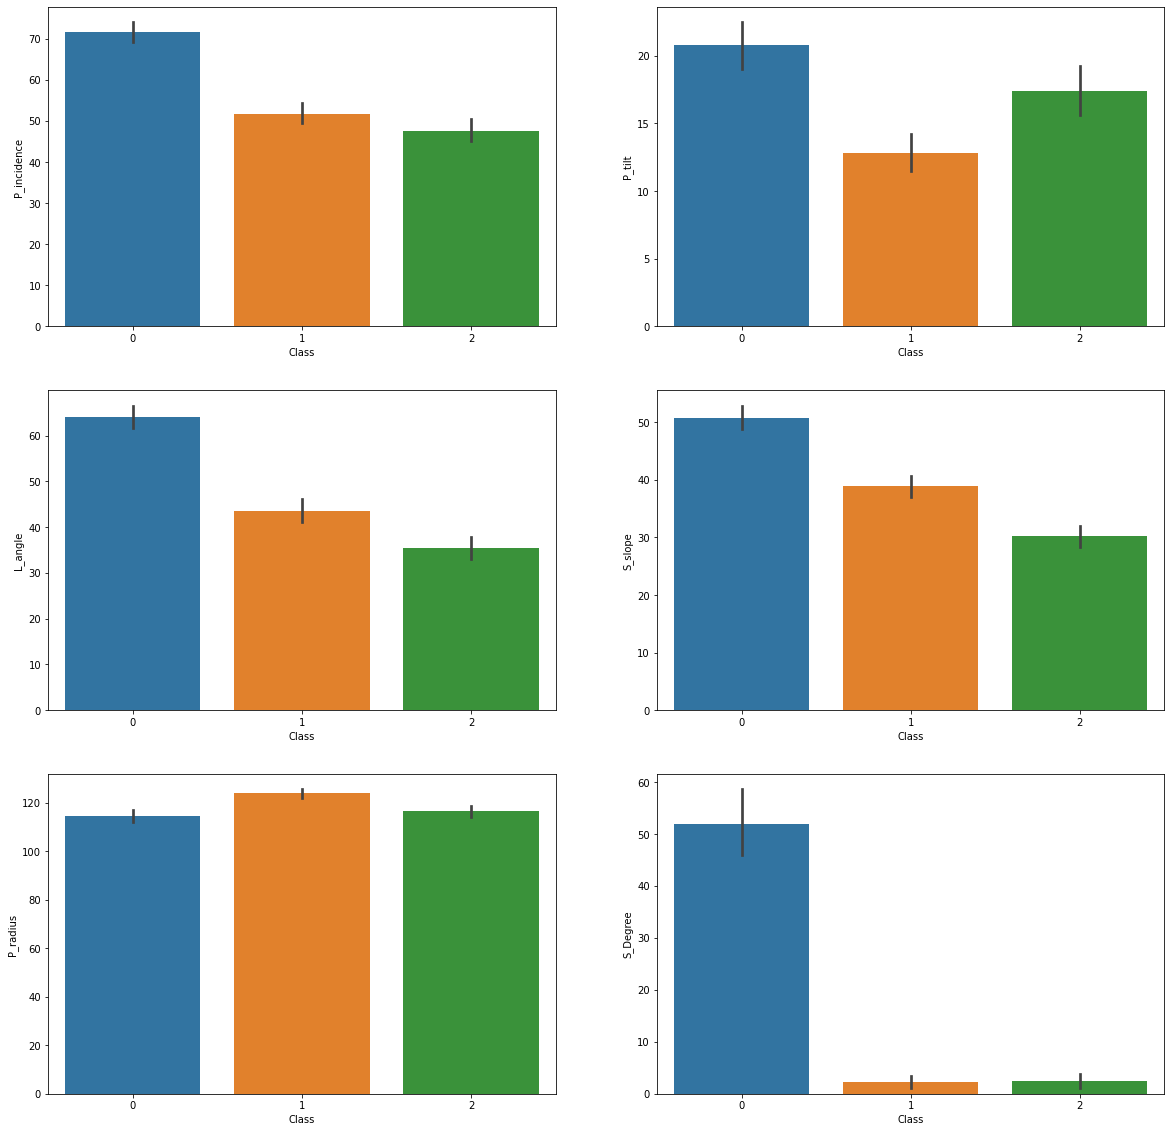

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.barplot('Class','P_incidence',data=dataset);

plt.subplot(3,2,2)
sns.barplot('Class','P_tilt',data=dataset);

plt.subplot(3,2,3)
sns.barplot('Class','L_angle',data=dataset);

plt.subplot(3,2,4)
sns.barplot('Class','S_slope',data=dataset);

plt.subplot(3,2,5)
sns.barplot('Class','P_radius',data=dataset);

plt.subplot(3,2,6)
sns.barplot('Class','S_Degree',data=dataset);

We can see that all the variables, with the possible exception of P_radius(minor variation), are showing a variation across the different classes.

Let's now look at the distribution of variables.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

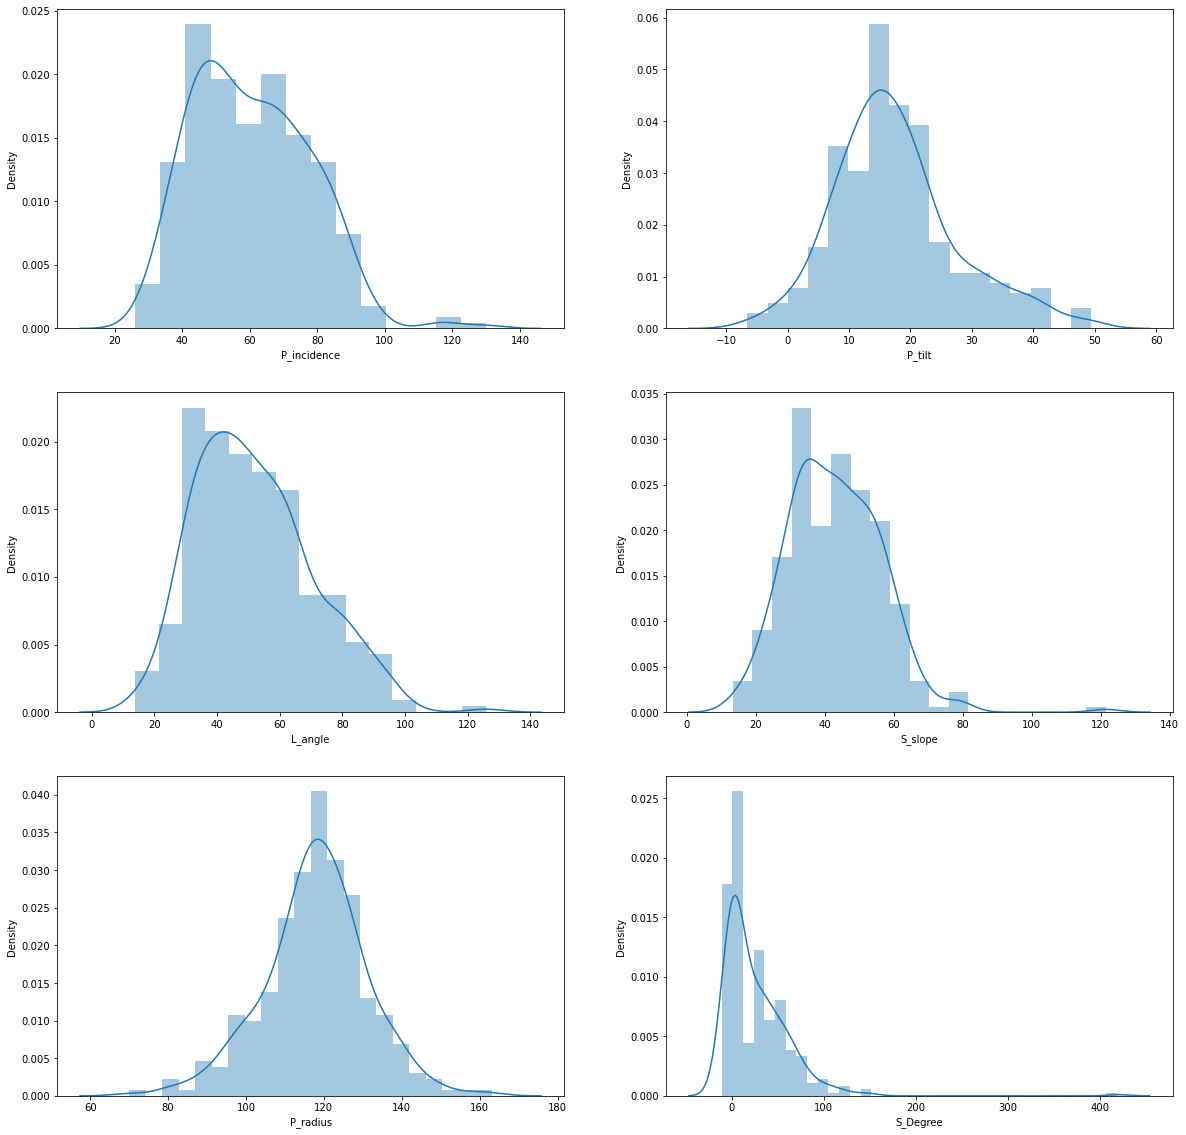

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.distplot(dataset['P_incidence']);

plt.subplot(3,2,2)
sns.distplot(dataset['P_tilt']);

plt.subplot(3,2,3)
sns.distplot(dataset['L_angle']);

plt.subplot(3,2,4)
sns.distplot(dataset['S_slope']);

plt.subplot(3,2,5)
sns.distplot(dataset['P_radius']);

plt.subplot(3,2,6)
sns.distplot(dataset['S_Degree']);

We can see that S_Degree is right skewed. The others are fine

Let's look at the box plots to detect outliers if any.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

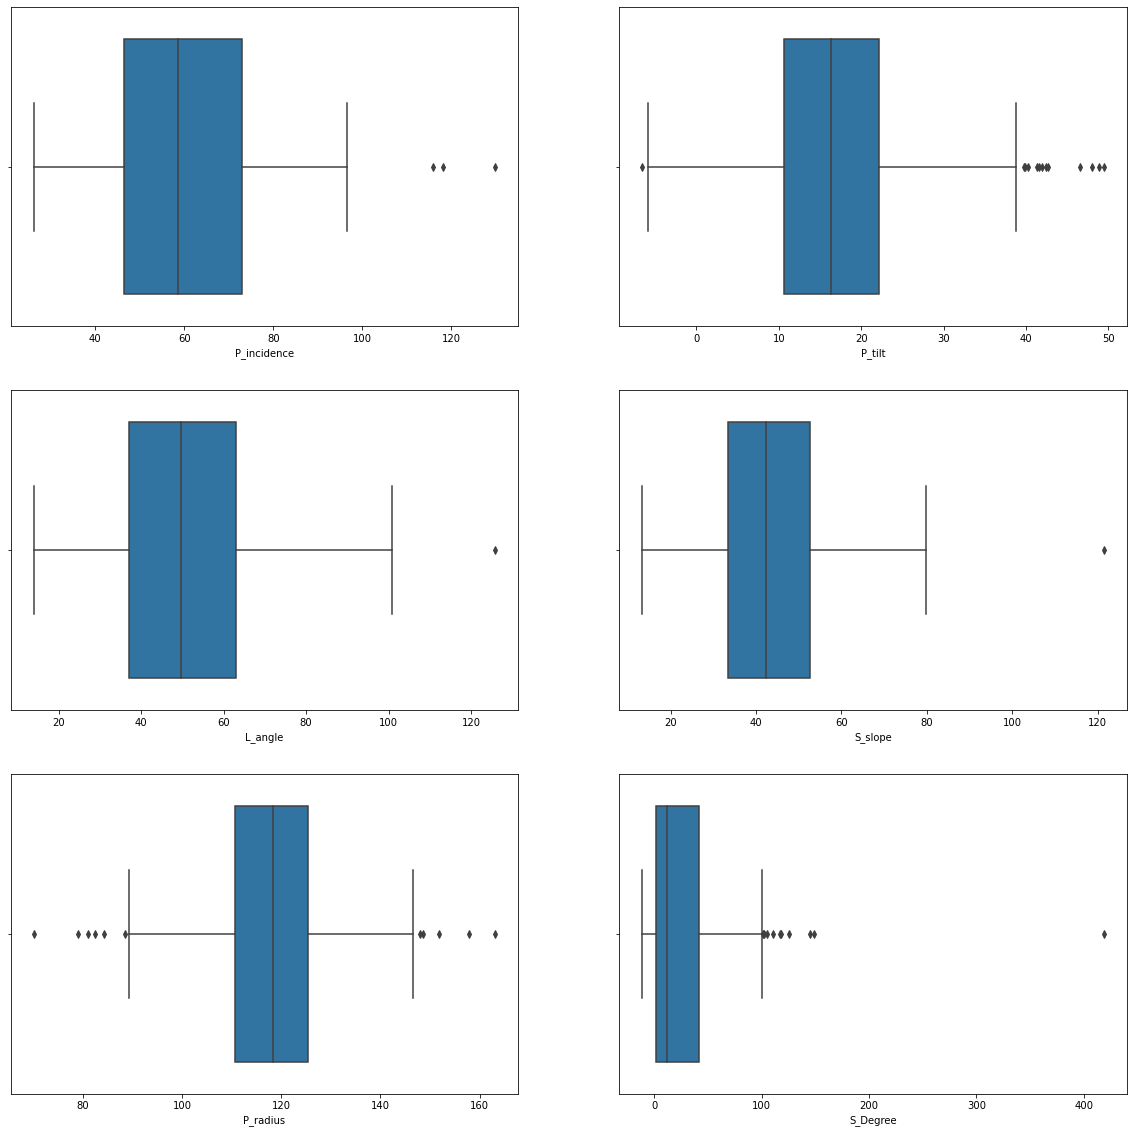

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(dataset['P_incidence']);

plt.subplot(3,2,2)
sns.boxplot(dataset['P_tilt']);

plt.subplot(3,2,3)
sns.boxplot(dataset['L_angle']);

plt.subplot(3,2,4)
sns.boxplot(dataset['S_slope']);

plt.subplot(3,2,5)
sns.boxplot(dataset['P_radius']);

plt.subplot(3,2,6)
sns.boxplot(dataset['S_Degree']);

There are a few outliers but nothing to be concerned about much.

Let's look at pairplots.

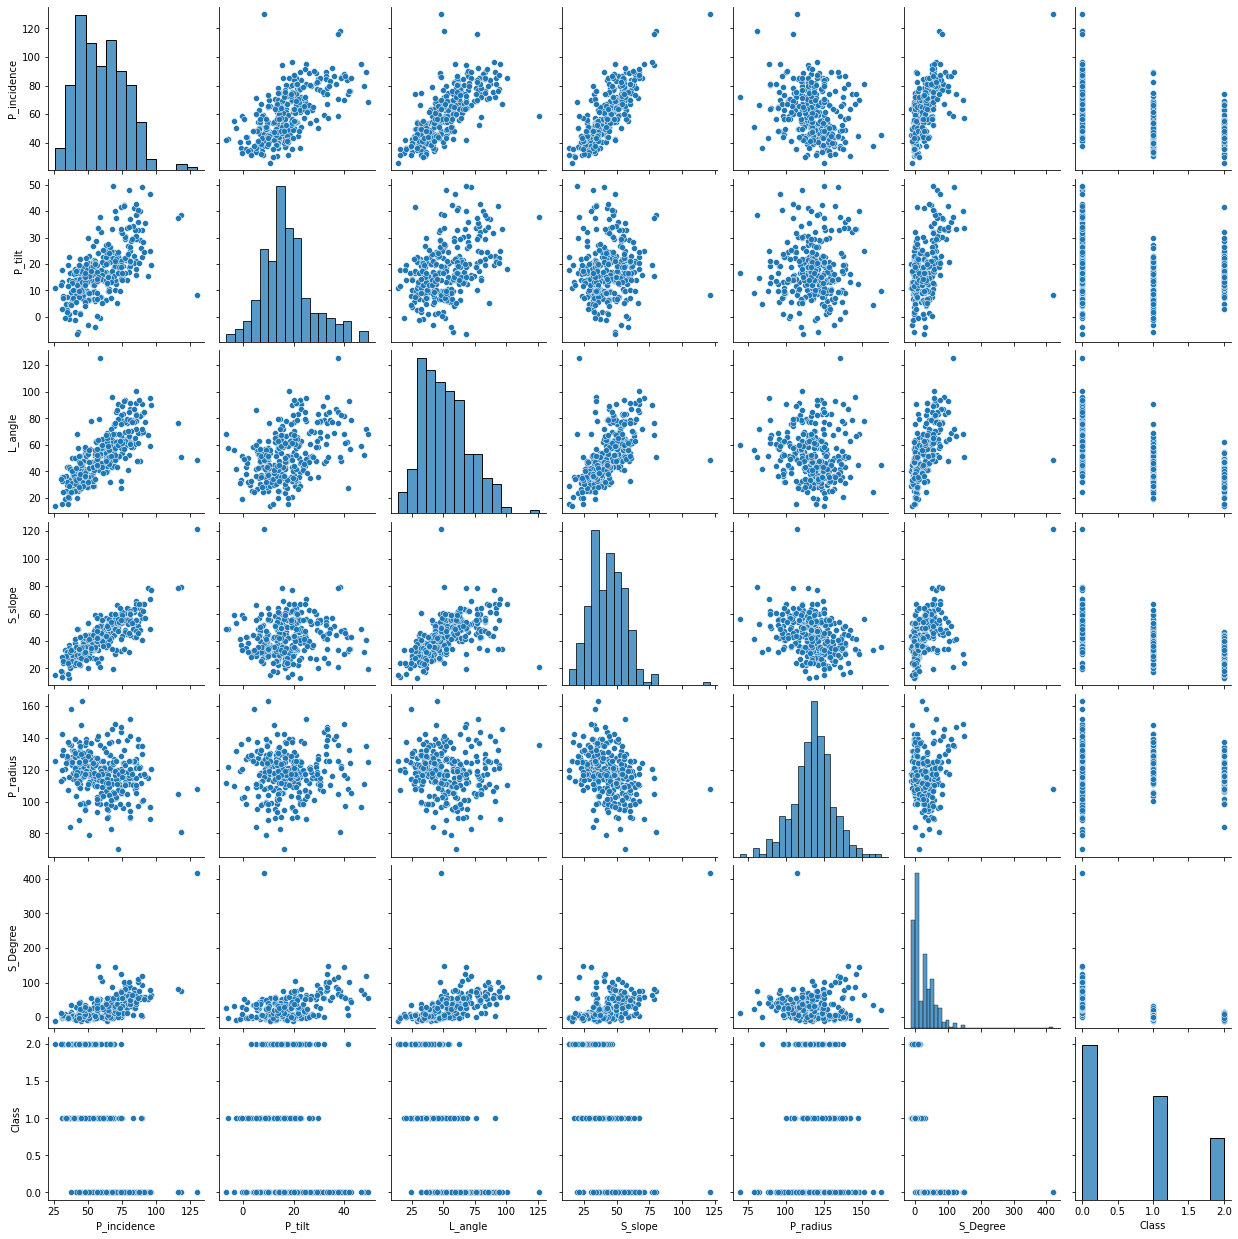

In [21]:
sns.pairplot(dataset);

We can easily see that linear relationships exist between several variable. There are minor violations in our basic assumption but we can ignore them as they are not too high

<b>Question 4</b>

<font color='darkblue'>Data Pre-processing</font>

Let's segregate predictors vs target variable

In [22]:
dataset.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1


We can see that Class is the target variable and others are predictors

Let's now check for target balancing

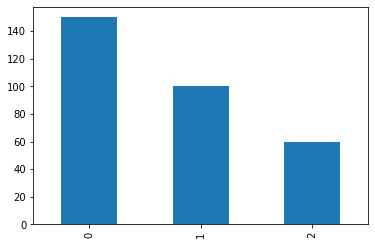

In [23]:
dataset['Class'].value_counts().plot(kind='bar');

In [24]:
dataset['Class'].value_counts()

0    150
1    100
2     60
Name: Class, dtype: int64

We can clearly see that the target is unbalanced. Unbalanced data might lead to issues with the model being more biased towards the more frequent outcome. We will still go ahead with the data as the frequency of the lowest class is not abnormally lower than the other classes.

Let's now continue with train test split and fitting the model.

In [25]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Class',axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<b>Question 5</b>

<font color='darkblue'>Model training, testing and tuning</font>

Let's design and train a knn classifier. We will take a value of 3 for initial analysis.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy for train data

In [29]:
knn.score(X_train,y_train)

0.9082125603864735

Accuracy for test data

In [30]:
knn.score(X_test,y_test)

0.8058252427184466

This is a clear case of overfitting.

In [31]:
y_pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8058252427184466
[[45  1  1]
 [ 2 27  8]
 [ 1  7 11]]


Let's standardize the data and check if that will improve the accuracy

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_std = pd.DataFrame(ss.fit_transform(X))
X_std.columns = X.columns

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8985507246376812
0.7961165048543689


We can see that scaling has not helped. Let's go ahead with the actual values

We will recreate the train test split with the original values and refit the model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now let's check how the accuracy varies with different values of n

In [39]:
nneigh = [k for k in range(3,21)]

In [40]:
score = []
for n in nneigh:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_train,y_train))

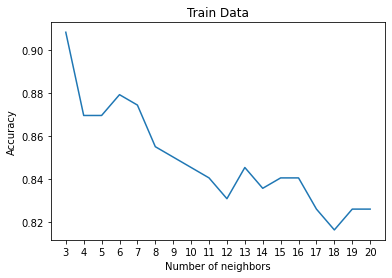

In [41]:
plt.plot(nneigh,score)
plt.xticks(nneigh)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("Train Data")
plt.show()

In [42]:
score = []
for n in nneigh:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))

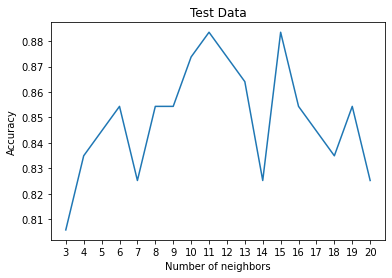

In [43]:
plt.plot(nneigh,score)
plt.xticks(nneigh)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("Test Data")
plt.show()

We can see that the highest accuracy comes with 11 and 15 on the test data. We will go with 11 as it is computationally less expensive.

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [45]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [46]:
y_pred = knn.predict(X_test)

Classification accuracies for train and test data

In [47]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8405797101449275
0.883495145631068


We can see that we no longer have the issue of overfitting as the test accuracy is higher than the train accuracy(which is highly desirable!!).

Confusion matrix

In [48]:
lab = ['Type_S','Normal','Type_H']

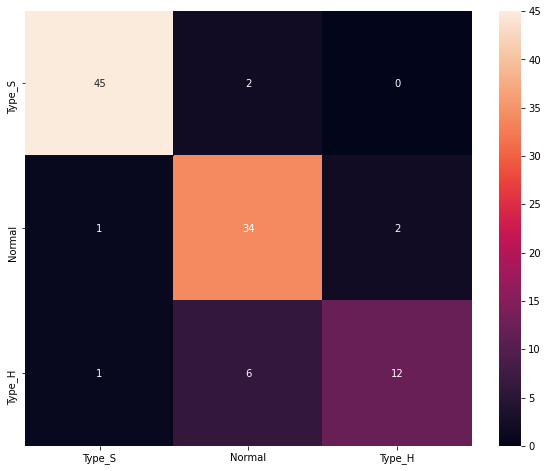

In [49]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1,2])

df_cm = pd.DataFrame(cm,index=lab,columns=lab)
plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True);
plt.show()

Classification report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.81      0.92      0.86        37
           2       0.86      0.63      0.73        19

    accuracy                           0.88       103
   macro avg       0.87      0.84      0.85       103
weighted avg       0.89      0.88      0.88       103



We can see that the precision values for all the three categories are fine but highest for type_s, followed by type_h and normal. Precision is what percentage of the predicted values are actually correct.

Recall is out of actual true, how many have been predicted correctly. type_s and normal are really good but type_h is not as good wrt this with a value of 0.63.

The F1-score which is a harmonic mean of these two seems fine for all the three but highest for type_s, followed by normal and type_h. 

The performance of type_h is not as good as the others wrt to the metrics and it is expected as its frequency is the lowest among the three due to which the model fit will be biased against it.

<b>Question 6</b>

<font color='darkblue'>Conclusion and improvisation</font>

The model fit seems good as the test accuracy is more than train accuracy. The recall for type_h is not optimal and this is expected as the frequency of type_h is the lowest among all. The precision values are fine for all. The scores are highest for type_s as expected because its frequency is the highest among all.

The quality of the data seems fine as there are no issues with the data like missing values etc. The outliers are also not too numerous. Only one of the variables is skewed(The others are more or less symmetrical)

The quantity of the data can improve. We have seen that the classes are a little unbalanced. More data points can be added to make it more balanced.

The data variety is not much as it is mostly confined to biomechanics attributes derived from the shape and orientation of the condition to their body part. We can attempt to bring more variety here.

The data velocity seems fine for this purpose as this deals with predicting the class of patients which is not usually a high velocity data.

The data veracity seems fine as we didn't see many outliers or other issues that might cast a doubt on its accuracy.

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Part2

 <b>Question 1</b>
 
 
 <font color=darkblue>  
   Import and Warehouse data
 </font> 


Let's import both the datasets

In [51]:
data1 = pd.read_csv('Part2 - Data1.csv')
data2= pd.read_csv('Part2 -Data2.csv')

In [52]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [53]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


Let's explore the shape and size of each

In [54]:
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


We can see both of them have the same row count but different columns. They both have ID column which can be used to join.

We will merge both the datasets(perform an inner join on ID)

In [55]:
dataset = pd.merge(data1,data2,on='ID',how='inner')

In [56]:
dataset.shape

(5000, 14)

 <b>Question 2</b>
 
 
 <font color=darkblue>  
   Data cleansing
 </font> 


Let's look at the data types of the variables in the dataset

In [57]:
dataset.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

The data types seem to be fine

Let's look at missing values

In [58]:
dataset.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

We have 20 missing values in the LoanOnCard variable which is the target variable. We will drop those observations as they are very few.

In [59]:
dataset.dropna(inplace=True)

In [60]:
dataset.shape

(4980, 14)

 <b>Question 3</b>
 
 
 <font color=darkblue>  
   Data analysis & visualisation
 </font> 


In [61]:
dataset.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


Let's look at the stats of the variables

In [62]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


We can see that Mortgage is highly skewed to the right.

In [63]:
dataset.groupby('LoanOnCard').size()

LoanOnCard
0.0    4500
1.0     480
dtype: int64

Let's prepare the zip code variable. Let's select the first two digits of the zip code. Let's call this a region

In [64]:
dataset['Region'] = dataset['ZipCode'].apply(lambda x: str(x)[0:2])

Let's use label encoding to encode the region labels

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['Region'] = le.fit_transform(dataset['Region'])

In [66]:
cont_variables = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
cat_variables =['Level','Security','FixedDepositAccount','InternetBanking','CreditCard','Region']

Let's look at the barplots of all continuous variables

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

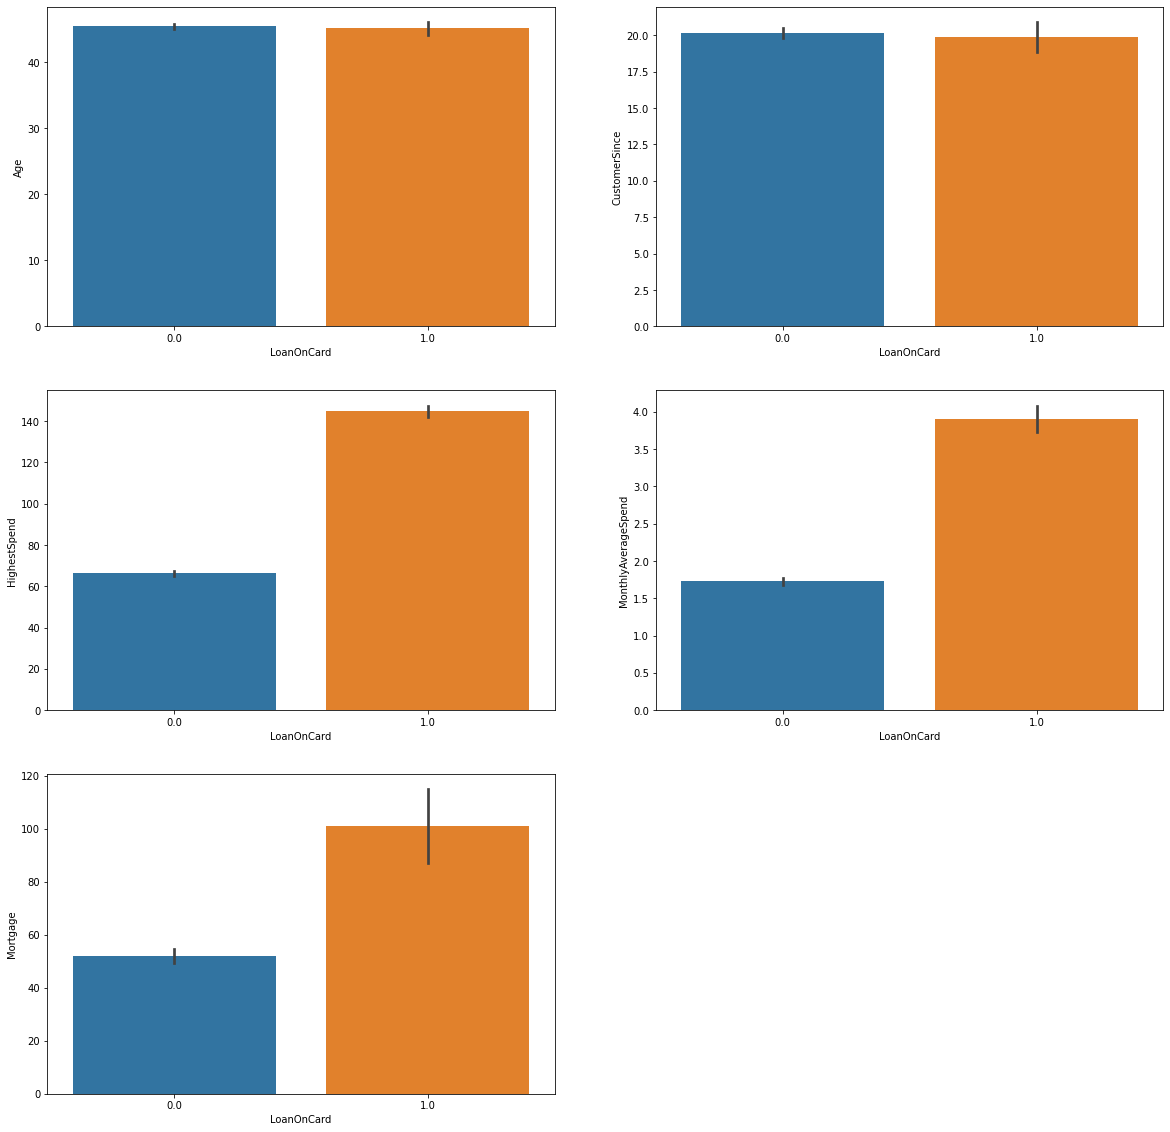

In [67]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.barplot('LoanOnCard','Age',data=dataset);

plt.subplot(3,2,2)
sns.barplot('LoanOnCard','CustomerSince',data=dataset);

plt.subplot(3,2,3)
sns.barplot('LoanOnCard','HighestSpend',data=dataset);

plt.subplot(3,2,4)
sns.barplot('LoanOnCard','MonthlyAverageSpend',data=dataset);

plt.subplot(3,2,5)
sns.barplot('LoanOnCard','Mortgage',data=dataset);

We can see from the above plots that Age and CustomerSince don't have much impact on LoanOnCard

We will next look at the impact of the categorical variables on LoanOnCard

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

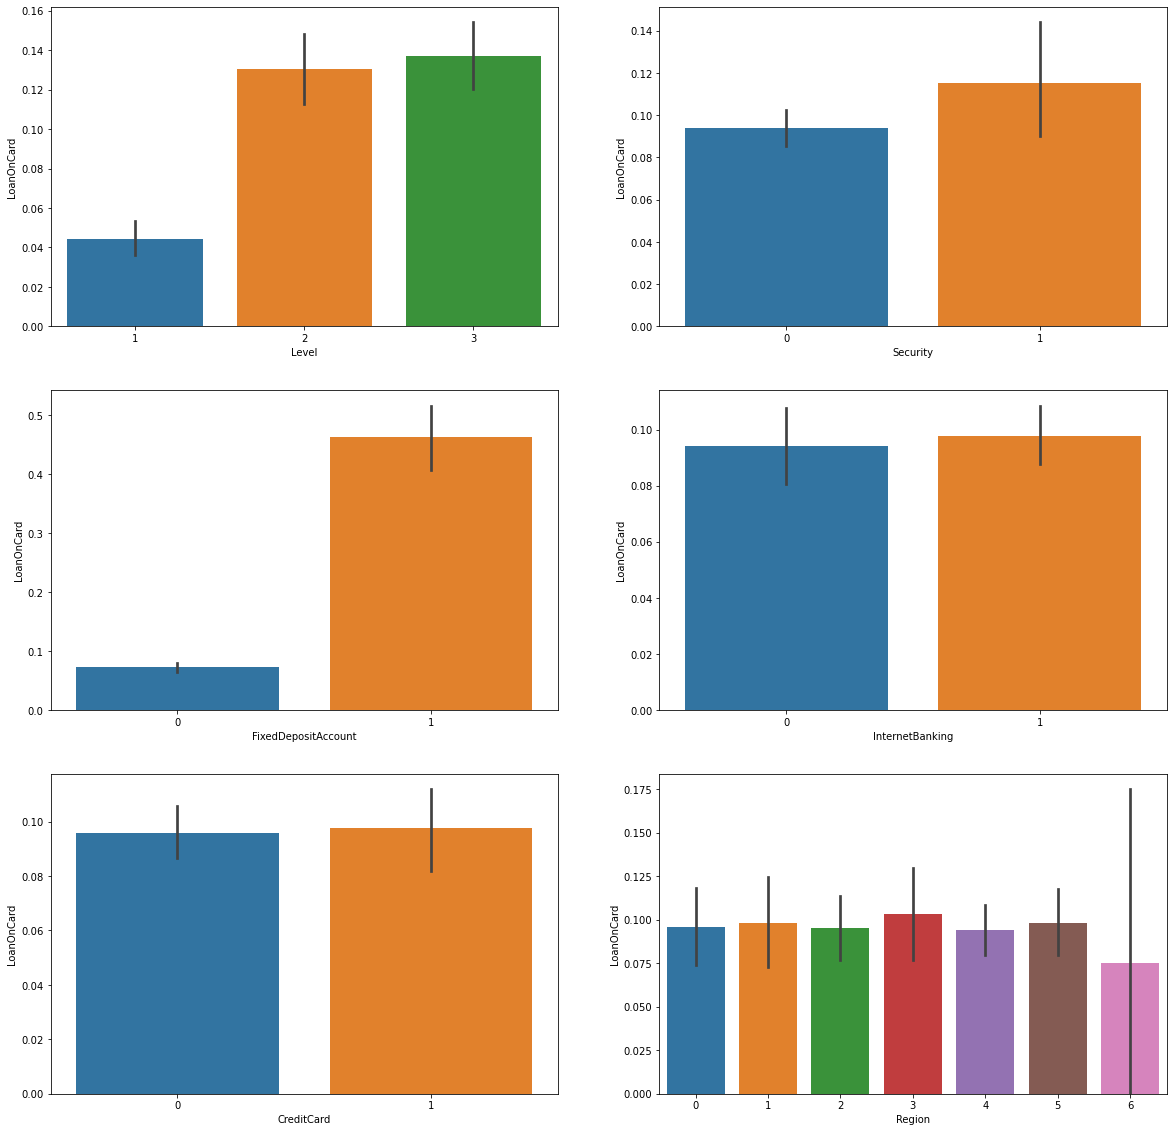

In [68]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.barplot('Level','LoanOnCard',data=dataset);

plt.subplot(3,2,2)
sns.barplot('Security','LoanOnCard',data=dataset);

plt.subplot(3,2,3)
sns.barplot('FixedDepositAccount','LoanOnCard',data=dataset);

plt.subplot(3,2,4)
sns.barplot('InternetBanking','LoanOnCard',data=dataset);

plt.subplot(3,2,5)
sns.barplot('CreditCard','LoanOnCard',data=dataset);

plt.subplot(3,2,6)
sns.barplot('Region','LoanOnCard',data=dataset);

We can see from the above plots that InternetBanking and CreditCard variables don't seem to be impacting LoanOnCard much.

Let's now look at the box plots to identify if there are any outliers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

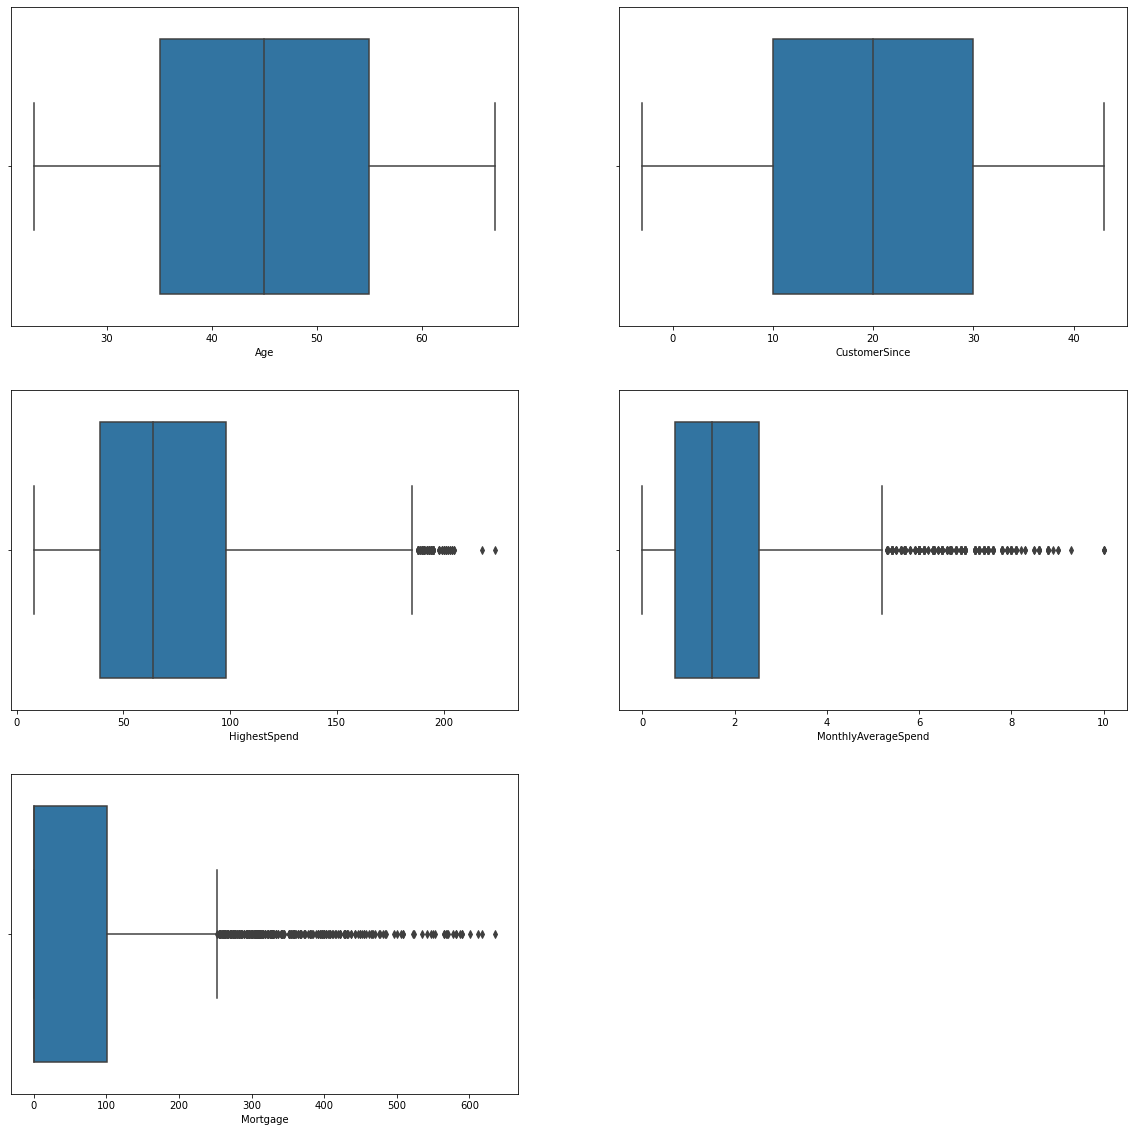

In [69]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot('Age',data=dataset);

plt.subplot(3,2,2)
sns.boxplot('CustomerSince',data=dataset);

plt.subplot(3,2,3)
sns.boxplot('HighestSpend',data=dataset);

plt.subplot(3,2,4)
sns.boxplot('MonthlyAverageSpend',data=dataset);

plt.subplot(3,2,5)
sns.boxplot('Mortgage',data=dataset);

From the above plots we can see that HighestSpend, MonthlyAverageSpend and Mortgage have many outliers and they are right skewed. Let's normalize the data by log transformation.

In [70]:
dataset['HighestSpend_Log'] = dataset['HighestSpend'].apply(lambda x:np.log(x+20))

In [71]:
dataset['MonthlyAverageSpend_Log'] = dataset['MonthlyAverageSpend'].apply(lambda x:np.log(x+0.5))

In [72]:
dataset['Mortgage_Log'] = dataset['Mortgage'].apply(lambda x:np.log(x+20))

We have applied the log transformations on the three varibles to fix the issue of outliers. Let's see those plots now

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

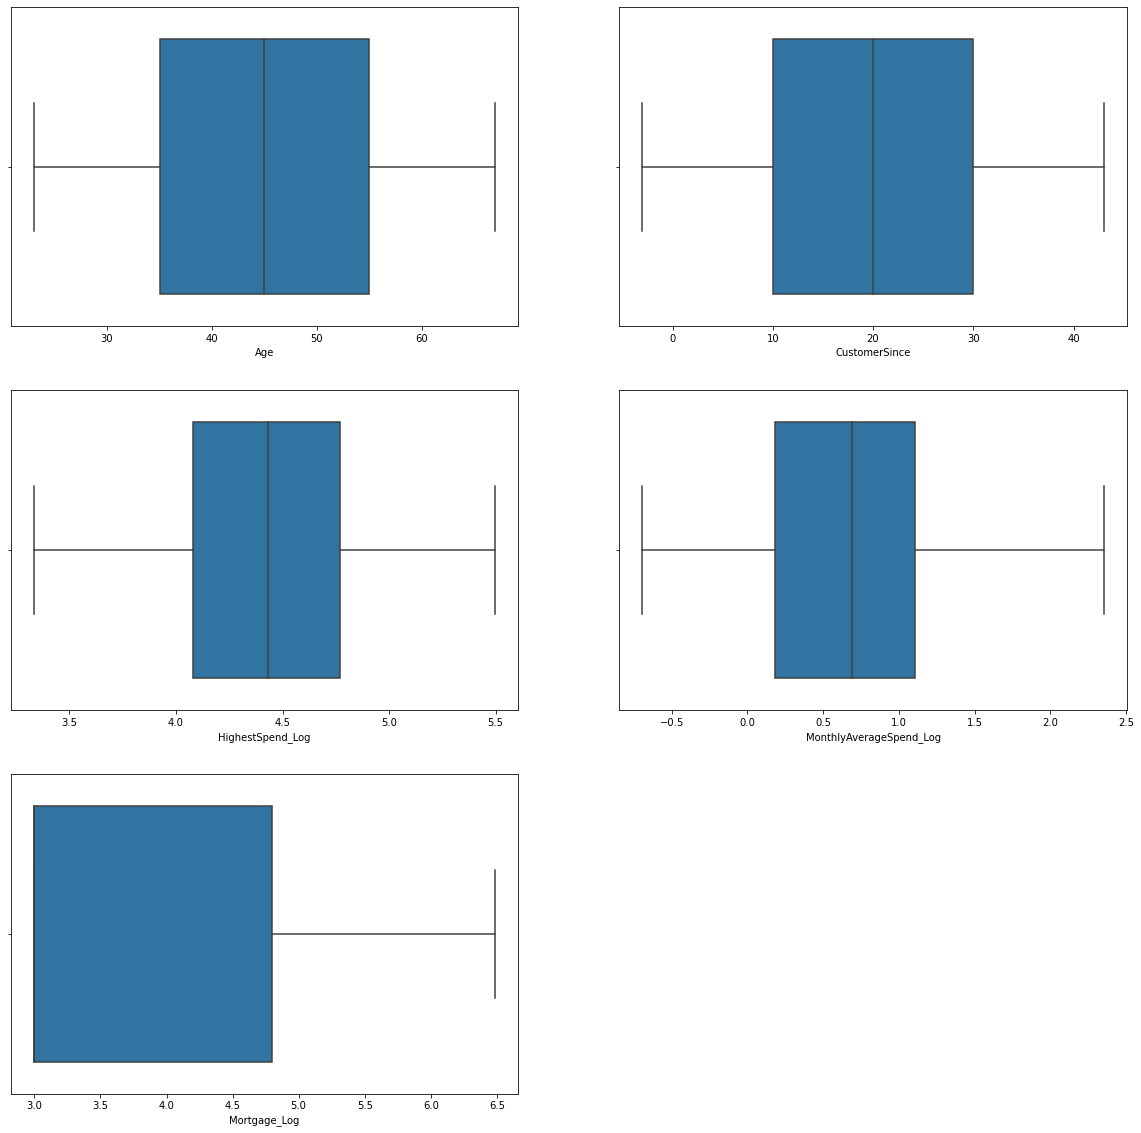

In [73]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot('Age',data=dataset);

plt.subplot(3,2,2)
sns.boxplot('CustomerSince',data=dataset);

plt.subplot(3,2,3)
sns.boxplot('HighestSpend_Log',data=dataset);

plt.subplot(3,2,4)
sns.boxplot('MonthlyAverageSpend_Log',data=dataset);

plt.subplot(3,2,5)
sns.boxplot('Mortgage_Log',data=dataset);

Now we don't see any outliers. Let's proceed

 <b>Question 4</b>
 
 
 <font color=darkblue>  
   Data pre-processing
 </font>

Let's look at the target variable's distribution

In [74]:
dataset['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

We can see that the data is highly unbalanced. Let's try to balance it by up sampling the minority class

In [75]:
from sklearn.utils import resample

In [76]:
dataset_majority = dataset[dataset.LoanOnCard == 0]
dataset_minority = dataset[dataset.LoanOnCard == 1]


dataset_minority_upsampled = resample(dataset_minority,replace=True,n_samples=4500,random_state=123)

dataset_upsampled = pd.concat([dataset_majority,dataset_minority_upsampled])

We have upsampled the minority group from 480 to 4500 by using the resample method

In [77]:
dataset_upsampled['LoanOnCard'].value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

We can now see that the target is balanced.

In [78]:
dataset.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard',
       'Region', 'HighestSpend_Log', 'MonthlyAverageSpend_Log',
       'Mortgage_Log'],
      dtype='object')

Let's now perform the train test split

In [79]:
from sklearn.model_selection import train_test_split


X = dataset_upsampled.drop(['ID','ZipCode','LoanOnCard','HighestSpend','MonthlyAverageSpend','Mortgage'],axis=1)
y = dataset_upsampled['LoanOnCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

 <b>Question 5</b>
 
 
 <font color=darkblue>  
   Model training, testing and tuning
 </font>

Let's fit a logistic regression model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Let's now look at the classification accuracies for train and test data.

In [81]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.876285240464345
0.869023569023569


0.88 for train and 0.87 for test seem good. There is no overfit here

In [82]:
y_pred = lr.predict(X_test)

Let's look at the classification report below

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1490
         1.0       0.85      0.89      0.87      1480

    accuracy                           0.87      2970
   macro avg       0.87      0.87      0.87      2970
weighted avg       0.87      0.87      0.87      2970



We can see that precision, recall and f1-score are all good(.85 or more). 
89% of all predicted to be 0 were actually 0 and 85% of all predicted to be 1 were actually 1.
85% of all the actual 0's were correctly predicted and 89% of all the actual 1's were correctly predicted.
The F1 score is the harmonic mean of precision and recall. It's 0.87 for both which is good.

Next let's fit a Naive Bayes classification model

In [84]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

Now let's look at the classification accuracies for train and test data

In [85]:
print(nb.score(X_train,y_train))
print(nb.score(X_test,y_test))

0.8747927031509121
0.8606060606060606


The accuracies of 87% and 86% are pretty good!!

Let's next create the classification  report

In [86]:
y_pred = nb.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1490
         1.0       0.86      0.85      0.86      1480

    accuracy                           0.86      2970
   macro avg       0.86      0.86      0.86      2970
weighted avg       0.86      0.86      0.86      2970



We can see that precision, recall and f1-score are all good(.85 or more). 
86% of all predicted to be 0 were actually 0 and 86% of all predicted to be 1 were actually 1.
87% of all the actual 0's were correctly predicted and 85% of all the actual 1's were correctly predicted.
The F1 score is the harmonic mean of precision and recall. It's 0.86 for both which is good.

<b>Tuning techniques</b>

We used the first two digits of the zip code because they represent a region in the United States. All the entries in the same region have the same first two digits of the zip code. We applied log transformation to the three fields of 'HighestSpend', 'MonthlyAverageSpend' and 'Mortgage'. We then realized that the target variable was not balanced and hence we up sampled the minority class to get balance. We then split the data into train and test and then proceeded with building Logistic Regression and Naive Bayes models. 

 <b>Question 6</b>
 
 
 <font color=darkblue>  
   Conclusion and improvisation
 </font>

The results look promising. The metrics like accuracy, precision and recall are really good. Both the train and test accuracies are almost same, meaning there is no overfit. 

The quality of data is almost fine except for the missing values in the target variable due to which those records had to be dropped. There are also outliers which can be taken care of.

The number of records is 5000 which is not quite high. A bigger number can generate more conclusive results. There is room for improvement on this front.

The data includes several different variables. So the veracity seems fine.

The velocity of data for this purpose seems fine. As this model is to predict the customers who will avail loans, this velocity is enough for the purpose(Not a high velocity situation).

The veracity of data seems fine. There may be a few issues but they are expected.